In [ ]:
# SGDRegressor, mean_squared_error, scipy.spatial.distance, matplotlib, r2_score

#  Урок 4.

# 4.1 Практическое задание

очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое каччество *RMSE* у Вашего решения?

Загружем модули и исходные данные

In [15]:
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


**Решение** просто копипастим код для обучения из урока делаем шаг градиентного спуска чуть побольше

Итарации остановлены на шаге 191
Достигнуто RMSE 0.1319


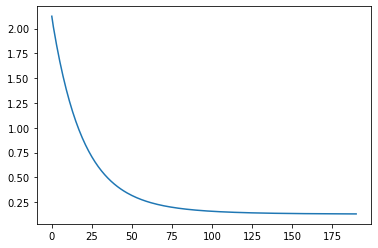

In [16]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.01, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
# какой RMSE удалось достичь
print("Достигнуто RMSE %.4f" % rmse_evolution[-1])
plt.plot(range(step), rmse_evolution);

**Вывод**: 

* Сколько шагов понадобилось? Остановились на шаге $191$
* Какое значение RMSE? Ответ: $0.1319$

*Примечание:* у слушателей не обязательно такие цифры, главное чтобы умели считать RMSE и количество шагов решения было меньше, чем $200$.

# 4.2 Задание среднего уровня 

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций понадобилось?

In [17]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
# -- ВАШ КОД ТУТ --

**Решение** 

Достигнуто R2 -32810092677246052517019648.0000


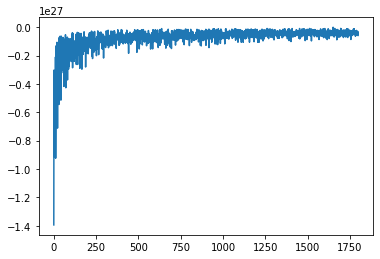

In [22]:
from sklearn.metrics import r2_score

del sgd_regressor

num_features = X.shape[1]

# learning_rate='constant', eta0=2.1
sgd_regressor = SGDRegressor(fit_intercept=False, random_state=42)
w_current, epsilon = np.random.random(num_features), 0.001
weight_evolution, r2_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(1800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итрации остановлены на шаге %d" % step); break
    r2_evolution.append(r2_score(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
# какой RMSE удалось достичь
print("Достигнуто R2 %.4f" % r2_evolution[-1])
plt.plot(range(step), r2_evolution[:-1]);

**Вывод**: модель не обучается, метрика $R^2$ огромная и веса не сходятся